In [5]:
# Automatically reloads modules on code changes
# Note: Does NOT automatically reload on cofiguration file changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.preprocessing import preprocessor
from src.linear_regression_forecast import lr_forecast
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
DATA_FOLDER = Path('../data/processed/')
STATES = ['CA', 'WI', 'TX']
STORES = [1, 2, 3, 4]

CA_1
Train score: 0.87
Test score: 0.91

CA_2
Train score: 0.89
Test score: 0.86

CA_3
Train score: 0.84
Test score: 0.86

CA_4
Train score: 0.75
Test score: 0.72

WI_1
Train score: 0.84
Test score: 0.83

WI_2
Train score: 0.85
Test score: 0.65

WI_3
Train score: 0.83
Test score: 0.8

TX_1
Train score: 0.82
Test score: 0.7

TX_2
Train score: 0.76
Test score: 0.63

TX_3
Train score: 0.8
Test score: 0.55



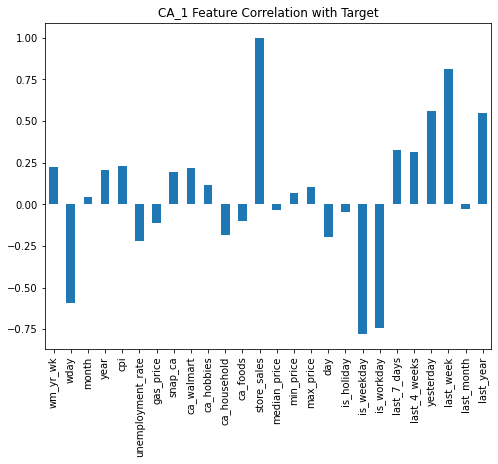

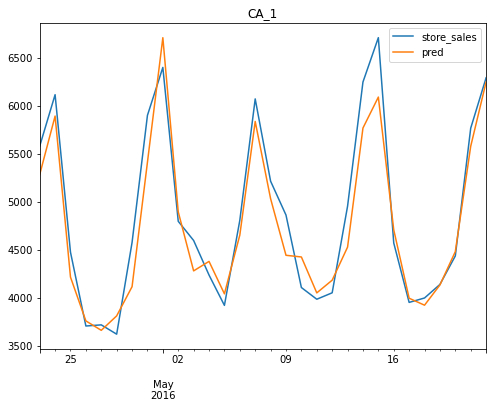

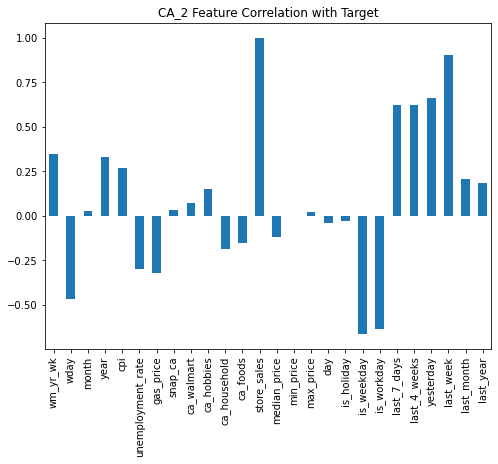

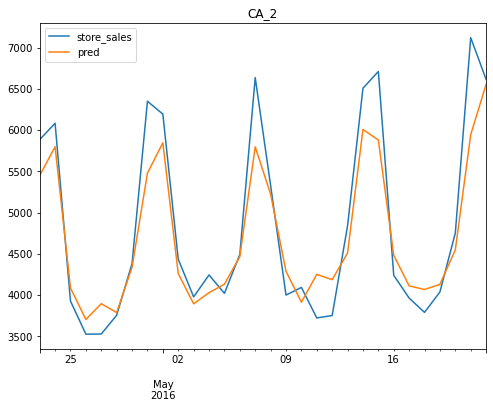

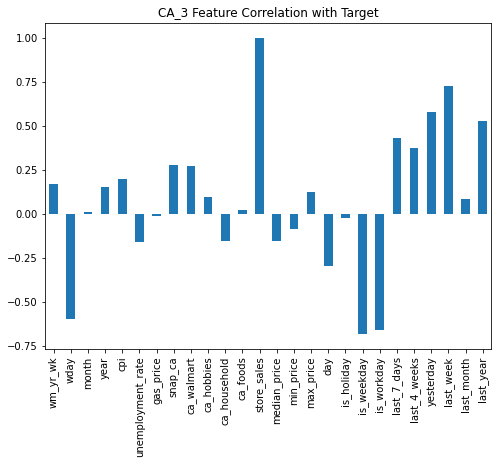

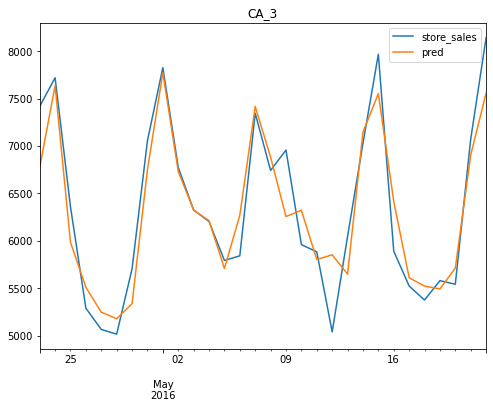

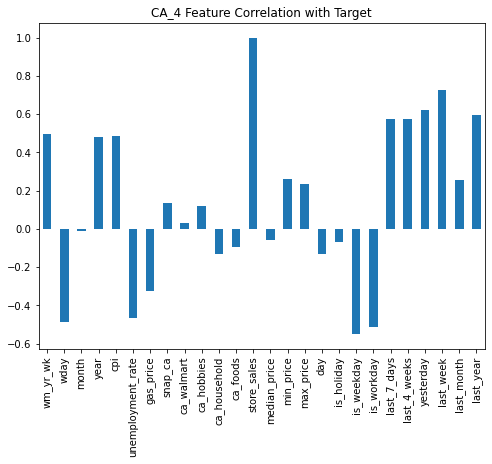

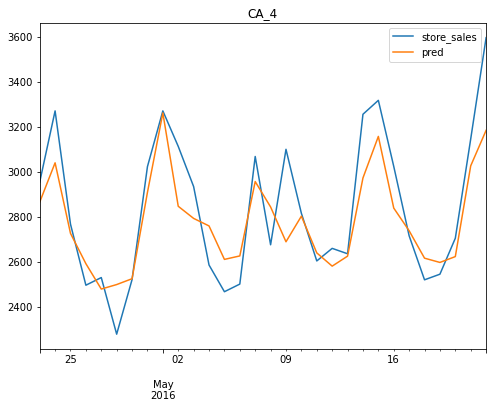

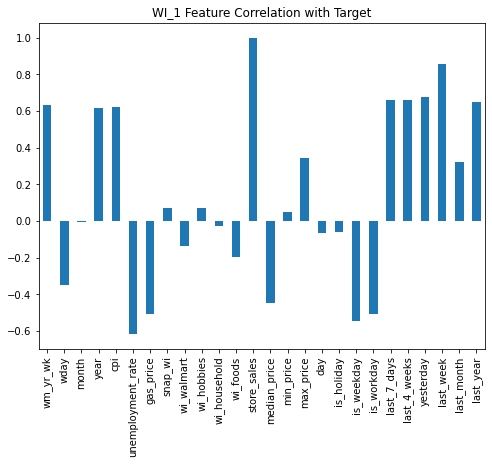

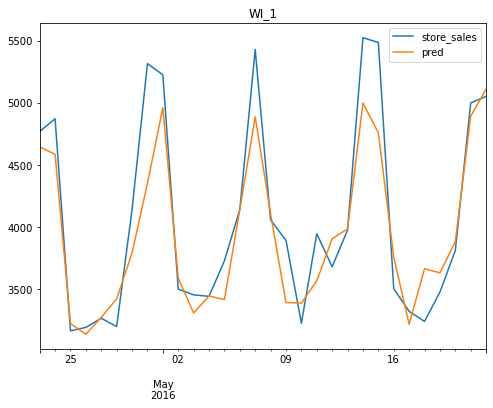

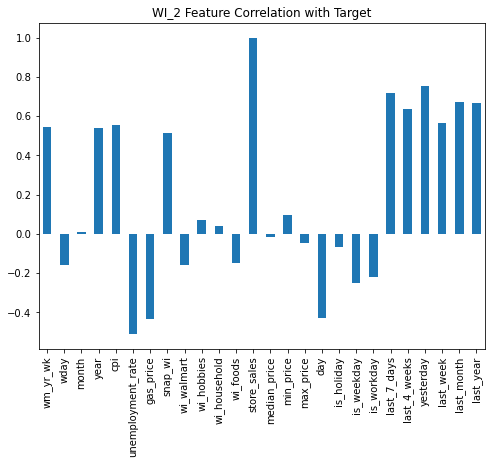

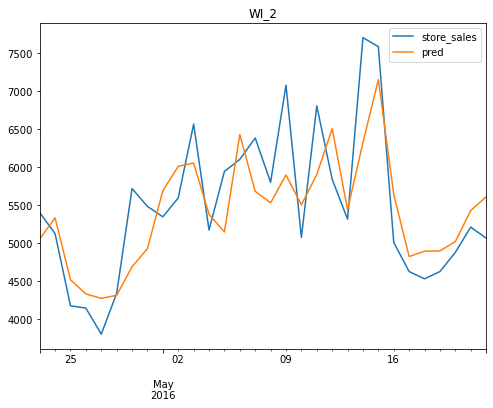

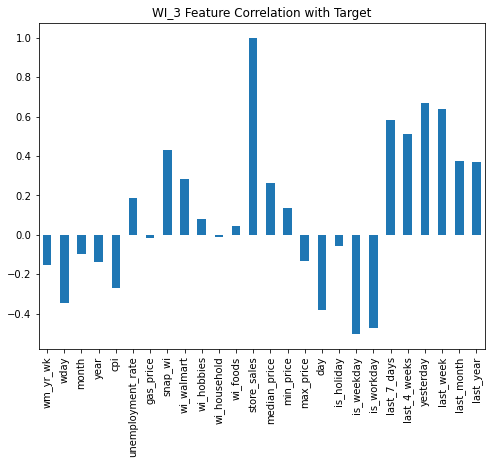

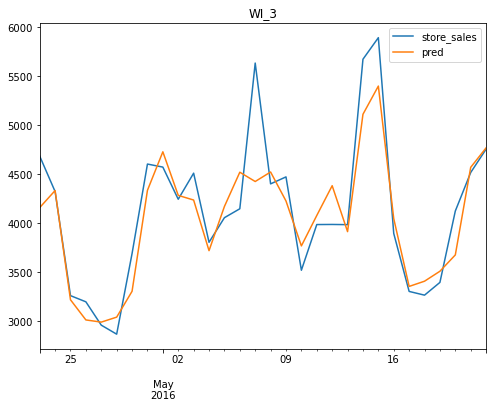

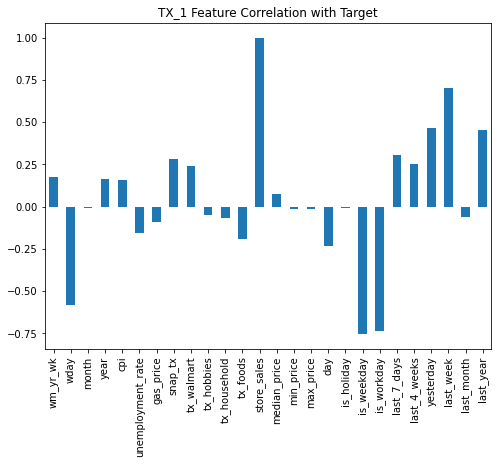

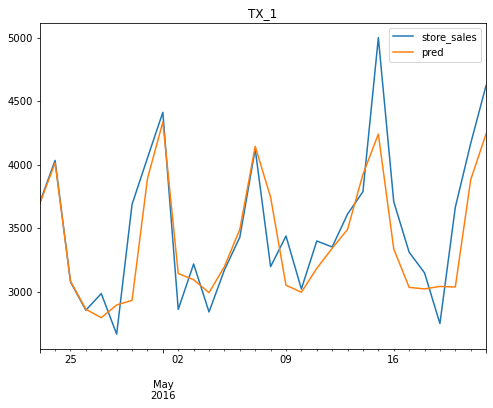

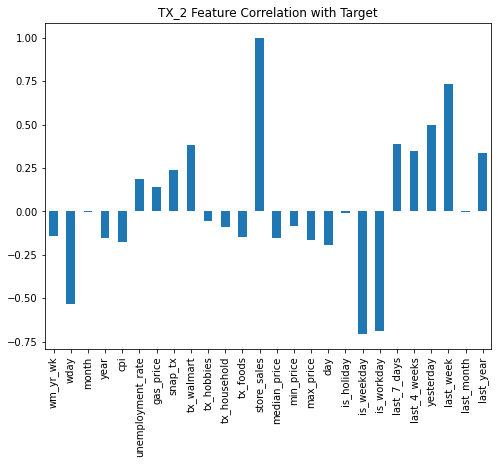

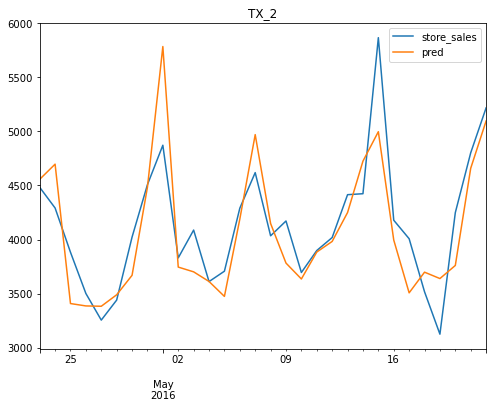

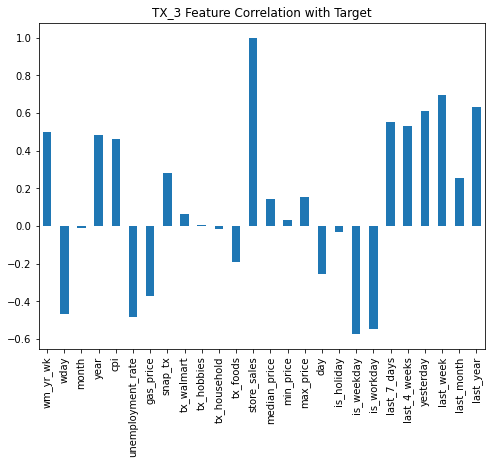

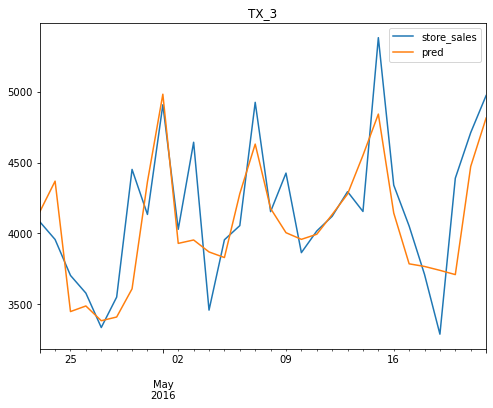

In [8]:

cat_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'season']

scores = []
feature_correlations = pd.DataFrame()
for store in product(STATES, STORES):
    store_id = f'{store[0].upper()}_{store[1]}'
    store_data = DATA_FOLDER / Path(f'{store_id}_sales_data.csv')
    try:
        df = preprocessor.load_and_preprocess(store_data)
        f, ax = plt.subplots(figsize=(8, 6))
        corr = df.corrwith(df['store_sales'])
        corr.plot(kind='bar')
        feature_correlations = pd.concat([feature_correlations, corr], axis=1)
        plt.title(f'{store_id} Feature Correlation with Target')
        print(store_id)
        trained_model, score = lr_forecast.split_train_and_plot(df, cat_cols)
        plt.title(store_id)
        scores.append(score)
    except FileNotFoundError:
        pass
    


In [9]:
print(f'Average r2 score of 10 stores is {np.mean(scores).round(2)}.')

Average r2 score of 10 stores is 0.75.


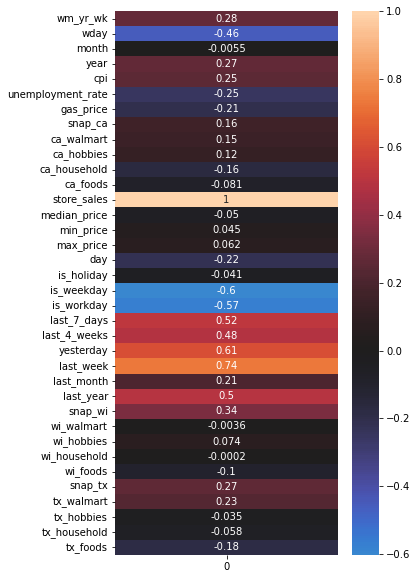

In [10]:
average_corr = pd.DataFrame(feature_correlations.agg('mean', axis=1))
f, ax = plt.subplots(figsize=(5, 10))
ax = sns.heatmap(average_corr, center=0, annot=True)

In [11]:
# What are some of the least correlated features? (avg. corr. < 0.10)
features_to_drop = ['month', 'median_price', 'min_price', 'max_price', 'is_holiday']

CA_1
Train score: 0.86
Test score: 0.91

CA_2
Train score: 0.89
Test score: 0.86

CA_3
Train score: 0.84
Test score: 0.86

CA_4
Train score: 0.76
Test score: 0.65

WI_1
Train score: 0.83
Test score: 0.84

WI_2
Train score: 0.86
Test score: 0.65

WI_3
Train score: 0.82
Test score: 0.78

WI_4
Train score: 0.82
Test score: 0.78

TX_1
Train score: 0.82
Test score: 0.7

TX_2
Train score: 0.79
Test score: 0.69



C:\Users\xiche\AppData\Local\Temp/ipykernel_4328/1357868645.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(8, 6))


TX_3
Train score: 0.8
Test score: 0.51

TX_4
Train score: 0.8
Test score: 0.51



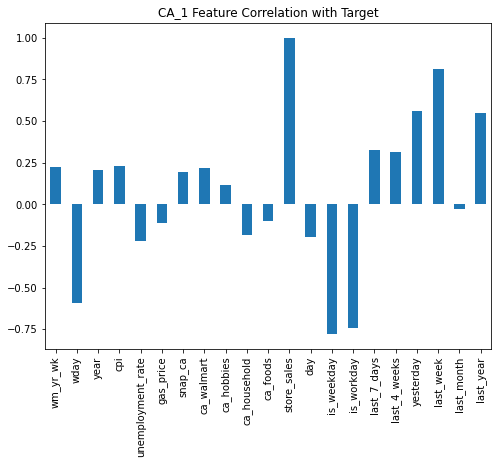

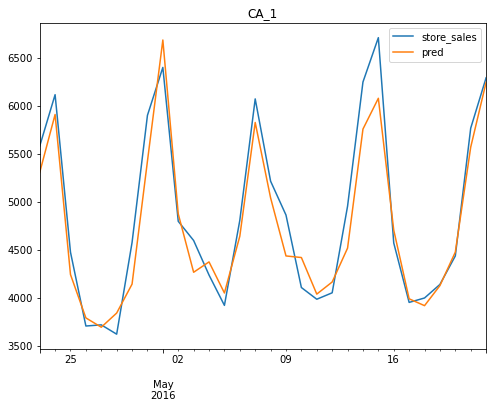

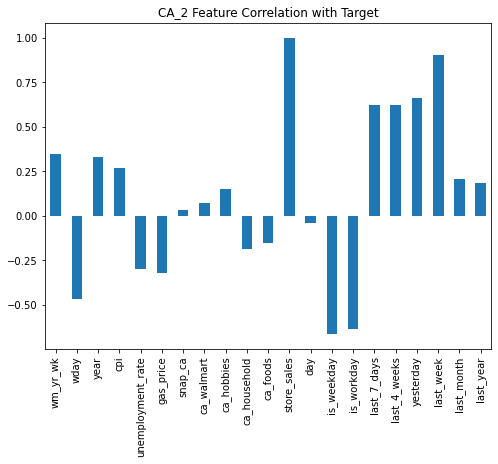

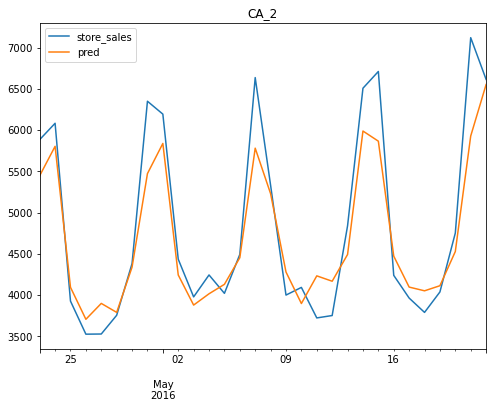

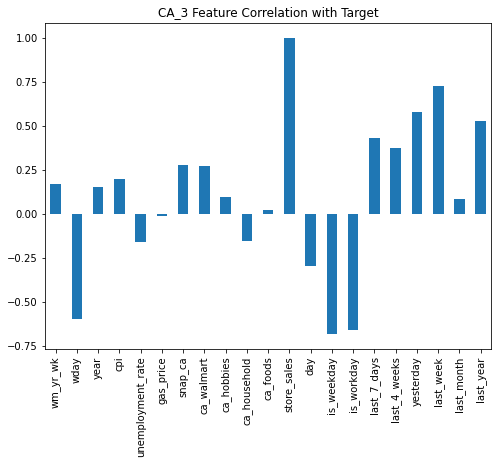

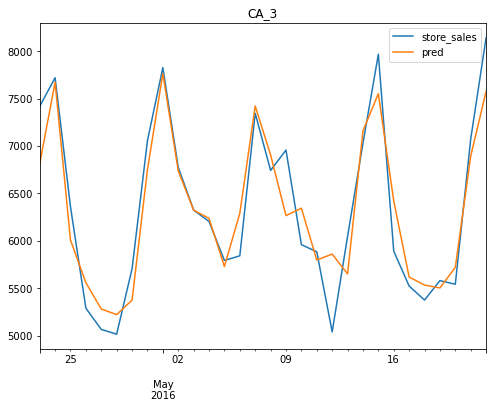

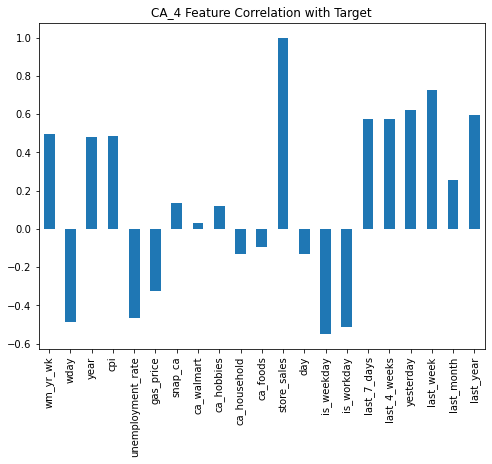

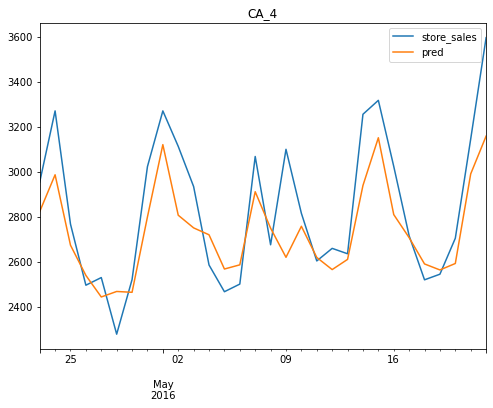

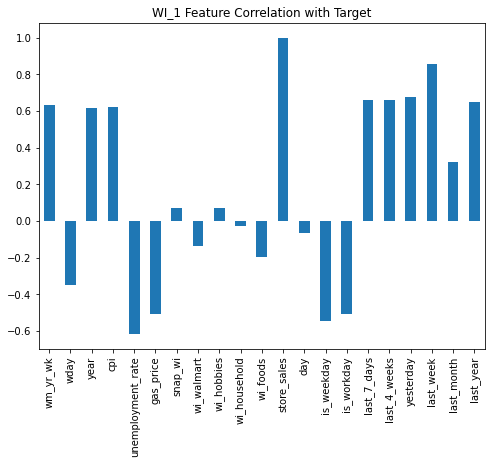

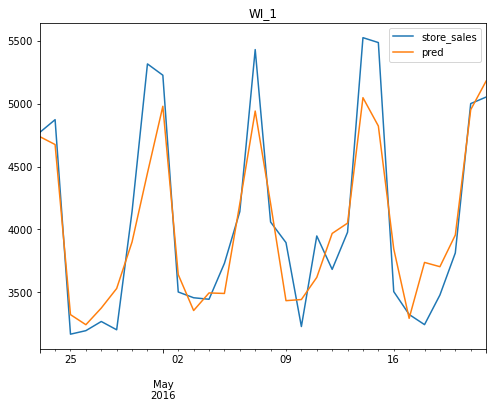

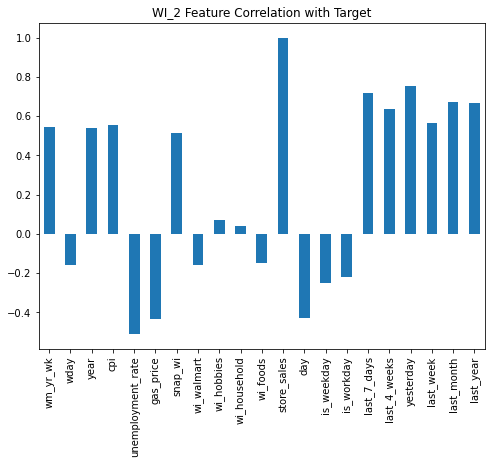

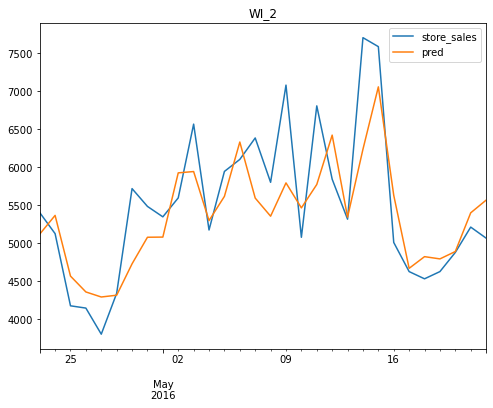

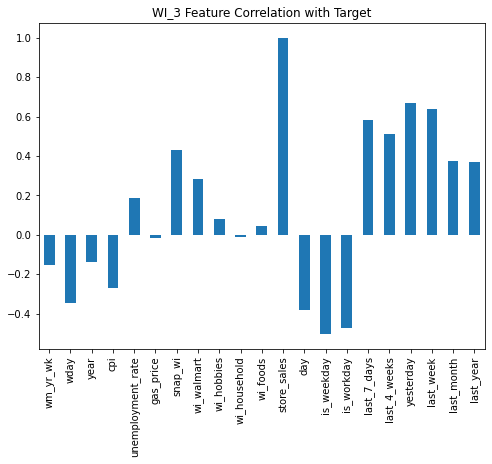

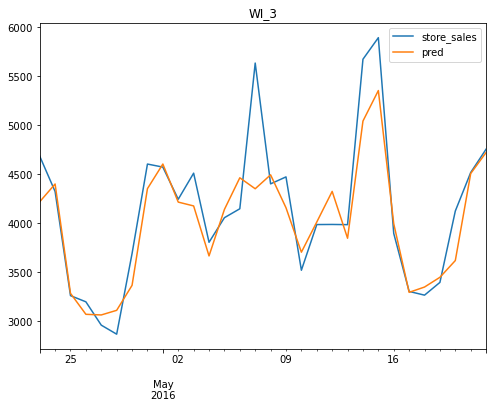

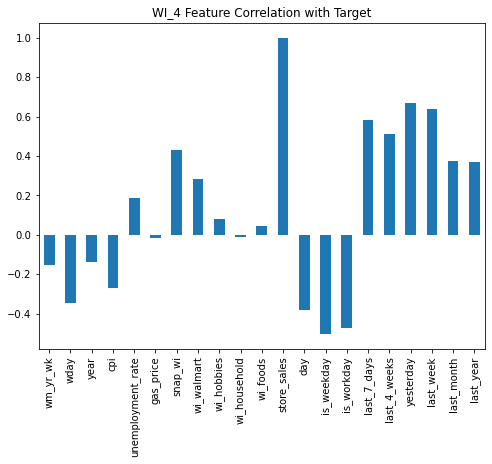

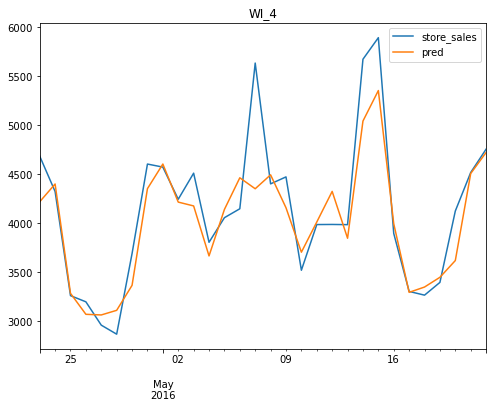

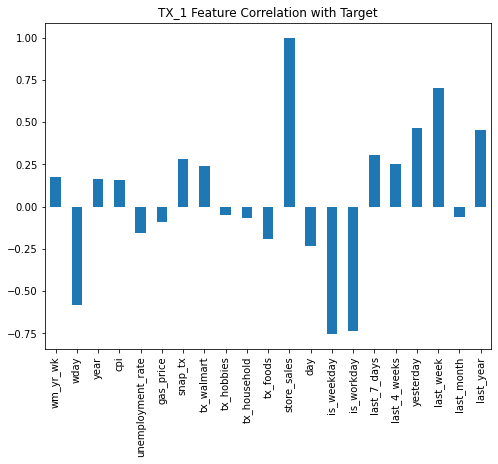

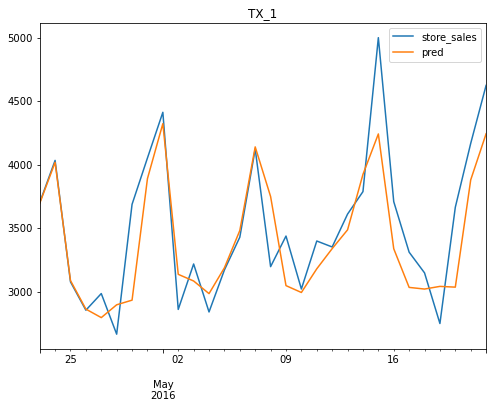

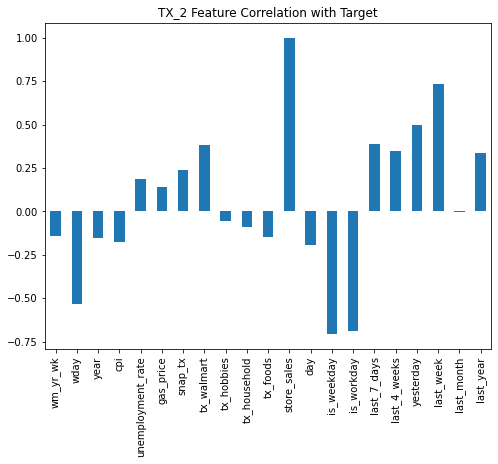

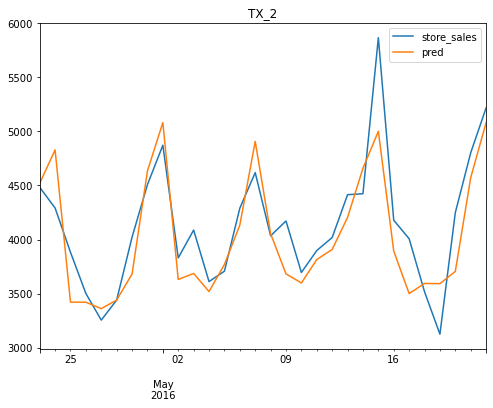

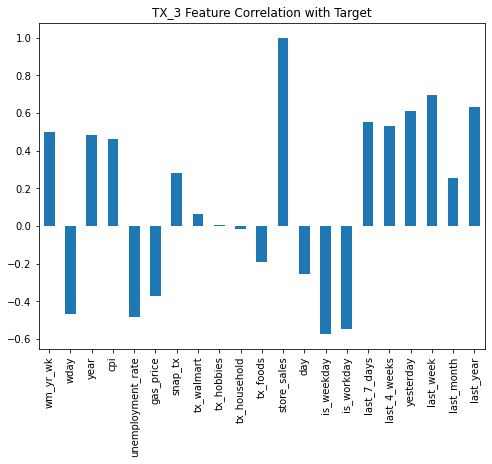

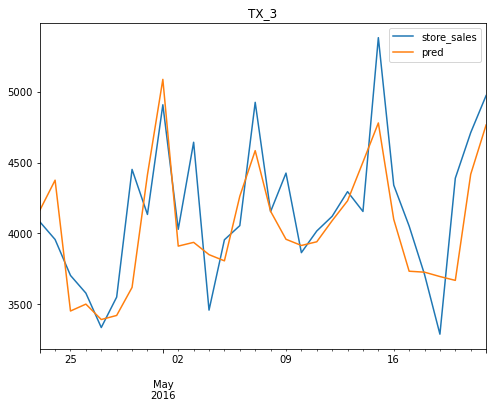

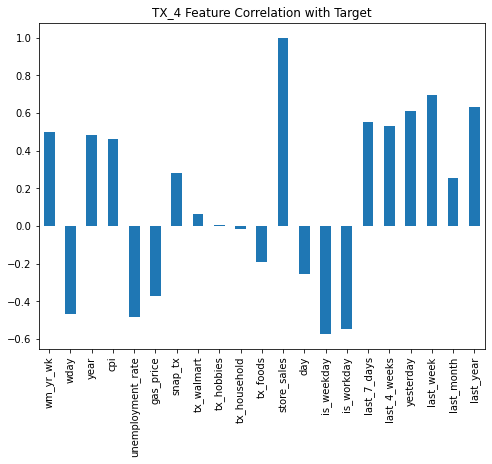

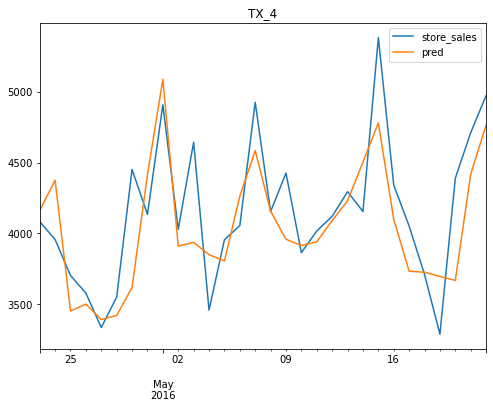

In [12]:
# Try again after dropping those features
for store in product(STATES, STORES):
    store_id = f'{store[0].upper()}_{store[1]}'
    store_data = DATA_FOLDER / Path(f'{store_id}_sales_data.csv')
    try:
        df = preprocessor.load_and_preprocess(data_file=store_data, features_to_drop=features_to_drop)
    except FileNotFoundError:
        pass
    f, ax = plt.subplots(figsize=(8, 6))
    corr = df.corrwith(df['store_sales'])
    corr.plot(kind='bar')
    feature_correlations = pd.concat([feature_correlations, corr], axis=1)
    plt.title(f'{store_id} Feature Correlation with Target')
    print(store_id)
    trained_model, score = lr_forecast.split_train_and_plot(df, cat_cols)
    plt.title(store_id)
    scores.append(score)


In [13]:
print(f'Average r2 score of 10 stores is {np.mean(scores).round(2)}.')
# 0.74 vs 0.75, small change

Average r2 score of 10 stores is 0.74.
